## CESM-LE SST BIAS CHECK: WOA2018
This is WOA2018 and is average upper ocean temperature (top 7.5 m) for the period 1981-2010

In [46]:
import xarray as xr
import numpy as np
import util

In [47]:
ds_obs = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/woa2018_DJF.POP_gx1v6.zarr')
ds_obs = ds_obs.isel(nlat=slice(0, 93))
#ds_obs

In [48]:
ds_mod = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/cesm-le-fields-djf.zarr')
ds_mod = ds_mod.isel(time=slice(60, 90))
#ds_mod

Calculate means, check out the datasets, then calculate the bias and check out it's data

In [49]:
sst_obs_mean = ds_obs.sst.sel(time=0)
sst_obs_mean

<xarray.DataArray 'sst' (nlat: 93, nlon: 320)>
dask.array<getitem, shape=(93, 320), dtype=float64, chunksize=(93, 160), chunktype=numpy.ndarray>
Coordinates:
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(93, 160), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(93, 160), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

In [50]:
sst_mod_mean = ds_mod.SST.mean(dim=['member_id', 'time'])
sst_mod_mean

<xarray.DataArray 'SST' (nlat: 93, nlon: 320)>
dask.array<mean_agg-aggregate, shape=(93, 320), dtype=float64, chunksize=(93, 320), chunktype=numpy.ndarray>
Coordinates:
    KMT      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

In [51]:
sst_bias = ds_mod.SST.mean(['member_id', 'time']) - ds_obs.sst
sst_bias = sst_bias.assign_coords(TLAT=ds_mod['TLAT'], TLONG=ds_mod['TLONG'])
sst_bias

<xarray.DataArray (nlat: 93, nlon: 320, time: 1)>
dask.array<sub, shape=(93, 320, 1), dtype=float64, chunksize=(93, 160, 1), chunktype=numpy.ndarray>
Coordinates:
    KMT      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon, time

Plot things if you want to:

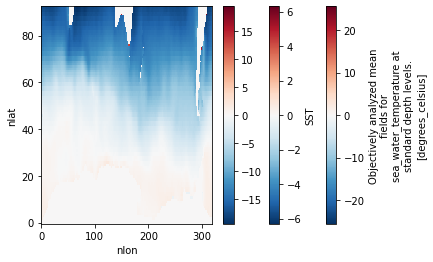

In [52]:
sst_obs_mean.plot()
sst_mod_mean.plot()
sst_bias.plot()

In [53]:
sst_mod_std = ds_mod.SST.std(dim=['member_id', 'time'])
sst_obs_std = ds_obs.sst.std()

for transforming data:

In [54]:
#sst_bias_std = sst_mod_std - sst_obs_std
#sst_bias_std.plot()

In [55]:
#sst_mod_trans = sst_obs_std * (ds_mod.SST - sst_mod_mean) / sst_mod_std + sst_obs_mean
#sst_mod_trans

In [56]:
#(sst_mod_trans.mean(dim=['member_id', 'time']) - sst_obs_mean).plot()

In [57]:
#(sst_mod_trans.std(dim=['member_id', 'time']) - sst_obs_std).plot()

___
## Visualize Polar

In [58]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean
import util

In [59]:
# Plotting Standards:
class MidpointNormalize(colors.Normalize):
    """
    class to help renormalize the color scale
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [60]:
# Lat Lon Source
lon = ds_obs.TLONG.values
lat = ds_obs.TLAT.values

In [61]:
sst_biases = xr.Dataset({'mod_mean': sst_mod_mean,
                        'obs_mean': sst_obs_mean, 
                        'mean_bias': sst_bias})
sst_biases

MergeError: conflicting values for variable 'TLAT' on objects to be combined. You can skip this check by specifying compat='override'.

In [ ]:
print('mod mean: 1981-2010')
print('mean:', sst_biases.mod_mean.mean().values)
print('min:', sst_biases.mod_mean.min().values)
print('max:', sst_biases.mod_mean.max().values)
print('obs mean')
print('mean:', sst_biases.obs_mean.mean().values)
print('min:', sst_biases.obs_mean.min().values)
print('max:', sst_biases.obs_mean.max().values)
print('bias')
print('mean:', sst_biases.mean_bias.mean().values)
print('min:', sst_biases.mean_bias.min().values)
print('max:', sst_biases.mean_bias.max().values)

In [ ]:
sst_biases = xr.Dataset({'mod_mean': sst_mod_mean})
print('mod mean: 1981-2010')
print('mean:', sst_biases.mod_mean.mean().values)
print('min:', sst_biases.mod_mean.min().values)
print('max:', sst_biases.mod_mean.max().values)

In [ ]:
sst_biases = xr.Dataset({'obs_mean': sst_obs_mean})
print('obs mean')
print('mean:', sst_biases.obs_mean.mean().values)
print('min:', sst_biases.obs_mean.min().values)
print('max:', sst_biases.obs_mean.max().values)

In [ ]:
sst_biases = xr.Dataset({'mean_bias': sst_bias})
print('bias')
print('mean:', sst_biases.mean_bias.mean().values)
print('min:', sst_biases.mean_bias.min().values)
print('max:', sst_biases.mean_bias.max().values)

## Plot CESM-LE

In [ ]:
# What are you plotting?
sst_biases = xr.Dataset({'mod_mean': sst_mod_mean})
to_plot = sst_biases
array = to_plot.mod_mean

# Make it Plottable
dsp = util.pop_add_cyclic(
    xr.Dataset({
        'feild': array,
        'TLAT': to_plot.TLAT.compute(),
        'TLONG': to_plot.TLONG.compute() } ))

In [ ]:
###########################  levels  -  norm  -  extent  -  projection  ############################    
levels = np.linspace(-2, 20, 23)
level_cont = [-1,0,5]

extent = ([-180, 180, -90, -50], ccrs.PlateCarree()) #[120, 260, 10, 65]
prj = ccrs.SouthPolarStereo()
###############################  Plotting Function:  'One Plot'  ###################################
def one_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels,
                     cmap=cmocean.cm.thermal,
                     transform=ccrs.PlateCarree())
    # contour lines
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='k',
                    levels=level_cont,
                    linewidths=0.5,
                    transform=ccrs.PlateCarree())
    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    return cf

In [ ]:
fig = plt.figure(figsize=(12, 10))
axs = []

# plot total
ax = fig.add_subplot(1, 1, 1, projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = one_plot(dsp.feild)
ax.set_title('CESM-LE mean', fontsize=20)
axs.append(ax)

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.6, orientation='horizontal', pad=0.075, ax=axs)
cb.ax.tick_params(labelsize=12)
cb.ax.set_title('SST °C', fontsize=15);

## Observations

In [ ]:
# What are you plotting?
sst_biases = xr.Dataset({'obs_mean': sst_obs_mean})
to_plot = sst_biases
array = to_plot.obs_mean

# Make it Plottable
dsp = util.pop_add_cyclic(
    xr.Dataset({
        'feild': array,
        'TLAT': to_plot.TLAT.compute(),
        'TLONG': to_plot.TLONG.compute() } ))

In [ ]:
###########################  levels  -  norm  -  extent  -  projection  ############################    
levels = np.linspace(-2, 20, 23)
level_cont = [-1,5]

extent = ([-180, 180, -90, -50], ccrs.PlateCarree()) #[120, 260, 10, 65]

prj = ccrs.SouthPolarStereo()

###############################  Plotting Function:  'One Plot'  ###################################
def one_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels,
                     cmap=cmocean.cm.thermal,
                     transform=ccrs.PlateCarree())

    # contour lines
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='whitesmoke',
                    levels=level_cont,
                    linewidths=0.5,
                    transform=ccrs.PlateCarree())
    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    return cf

In [ ]:
fig = plt.figure(figsize=(12, 10))
axs = []

# plot total
ax = fig.add_subplot(1, 1, 1, projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = one_plot(dsp.feild)
ax.set_title('Observations: WOA2018', fontsize=20)

axs.append(ax)

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.6, orientation='horizontal', pad=0.075, ax=axs)
cb.ax.tick_params(labelsize=12)
cb.ax.set_title('SST °C', fontsize=15);

## Repeat for Bias

In [ ]:
dso = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/woa2018_DJF.POP_gx1v6.zarr')
dso = dso.isel(nlat=slice(0, 93))
dsm = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/cesm-le-fields-djf.zarr')
bias = dsm.SST.mean(['member_id', 'time']) - dso.sst.isel(time=0)
bias = bias.assign_coords(TLAT=dsm['TLAT'], TLONG=dsm['TLONG']).rename('bias').compute()
biasp = util.pop_add_cyclic(bias.to_dataset())

In [ ]:
dsp=biasp

In [ ]:
###########################  levels  -  norm  -  extent  -  projection  ############################    
levels_bias = np.linspace(-15.5, 2, 36)
norm = MidpointNormalize(midpoint=0.)
extent = ([-180, 180, -90, -50], ccrs.PlateCarree()) #[120, 260, 10, 65]
prj = ccrs.SouthPolarStereo()
###############################  Plotting Function:  'One Plot'  ###################################
def one_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels_bias,
                     norm=norm,
                     cmap=cmocean.cm.balance,
                     #extend='both',
                     transform=ccrs.PlateCarree())
    # contour lines
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='k',
                    levels=levels_bias,
                    linewidths=0.25,
                    transform=ccrs.PlateCarree())
    if lines:
        # add contour labels
        lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r')
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    return cf

In [ ]:
#BIAS
fig = plt.figure(figsize=(12, 10))
axs = []

# plot total
ax = fig.add_subplot(1, 1, 1, projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = one_plot(biasp.bias, lines=False)
ax.set_title('CESM-LE Bias', fontsize=20)
axs.append(ax)

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.6, orientation='horizontal', pad=0.075, ax=axs)
cb.ax.tick_params(labelsize=12)
cb.ax.set_title('$\Delta$ SST °C', fontsize=15);